# Gün 1 bölüm 1: Basit bir bölmeli modelin gösterimi

<div style="background: #f8f9fa; padding: 0.5rem 1rem; border-radius: 8px; margin-bottom: 1rem; border-left: 4px solid #007bff;">
<a href="../../index.ipynb" style="text-decoration: none; color: #007bff; font-weight: bold;">← Kurs Dizinine Geri Dön</a> | 
<a href="../../index-tr.ipynb" style="text-decoration: none; color: #dc3545; font-weight: bold;">🇹🇷 Türkçe Index</a>
</div>

---

Önceki oturumlarımızda bulaşıcı hastalıkları tanımlamak için bölmeli modellerin nasıl kullanılabileceğini gözden geçirdik. Ayrıca geçiş oranlarının nasıl belirtileceğini, zaman dağılımları ile ilişkisini ve basit modelleme çıktılarını nasıl yorumlayacağımızı inceledik. Bu ilk pratik çalışma sırasında önce basit bir kohort modelinin nasıl kodlandığını göreceğiz ve ayrıca modelin temel varsayımlarını test etmeyi de inceleyeceğiz.

## 1. Basit bir kohort modeli

Çalıştığımız kohort modelini hatırlayın, burada enfekte bireylerin bir başlangıç popülasyonuyla başlayıp iyileşmeye geçişe izin veriyoruz. O modelin temel yapı taşlarının neler olduğunu görelim.

In [1]:

# Bazı yararlı paketleri yükle:
library(deSolve)  # Diferansiyel denklemleri çözmek için 
library(reshape2) # Model çıktımızı düzenlemek için
library(ggplot2)  # Güzel grafikler üretmek için!
library(here)     # Her zaman çalışma dizinimizde olduğumuzdan emin olmak için


###################
#  Şimdi kohort modelimizi kodlayalım 

# Toplam popülasyonumuzu N olarak adlandıracağız. N için bir parametre oluşturalım
N <- 1000

### Bazı model girdileri

# Başlangıç koşulları: Kodlamak istediğimiz kohort modelinin iki aşaması var, I Enfekte ve R (iyileşen) 

# Modelin durum değişkenlerini içeren bir vektör oluşturalım

initial_state_values <- c(
                          I = N,
                          R = 0)           

# Model bölmelerine I ve R'ye başlangıç değerleri atadığımızı unutmayın

# Günlük parametre değerleri: Enfeksiyon süresinin ortalama 2 gün olduğunu biliyoruz
# Buna göre iyileşme oranını (gamma) şu şekilde ifade edebiliriz:

parameters <- c(gamma = 1/2)


# ZAMAN ADIMLARI:

# Bu, modeli çözeceğimiz zaman adımları dizisini saklayan bir vektör
times <- seq(from = 0, to = 50, by = 1)   # 0'dan 50 güne kadar günlük aralıklarla


### Şimdi modeli kodlayalım ! 

## ODEs 
# Aşağıdaki model fonksiyonu giriş argümanları olarak 
# (şu sırayla) alır: zaman, durum ve parametreler
# Diferansiyel denklemlerin nasıl kodlandığını not edin ve notlarınızla karşılaştırın ! 

cohort_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {     
    
    # Toplam popülasyon büyüklüğü N'i hesaplama (her bölmedeki kişi sayısının toplamı)
    N <- I+R
    
    # Diferansiyel denklemler
    dI  <- -gamma * I     
    dR <- gamma * I

    return(list(c(dI, dR))) 
  })
  
}


here() starts at C:/Users/juano/Dropbox/Code/Git/ankara-modelling-2025-notebooks



### 1.1 Kohort modelini çalıştırma

I ve R bölmeli basit bir kohort modeli kodladık, bu durumlar için başlangıç koşulları ve ayrıca iyileşme oranını yansıtmak için gamma geçiş parametresini tanımladık.

Şimdi modeli çalıştıralım ve bazı çıktıları görelim:

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


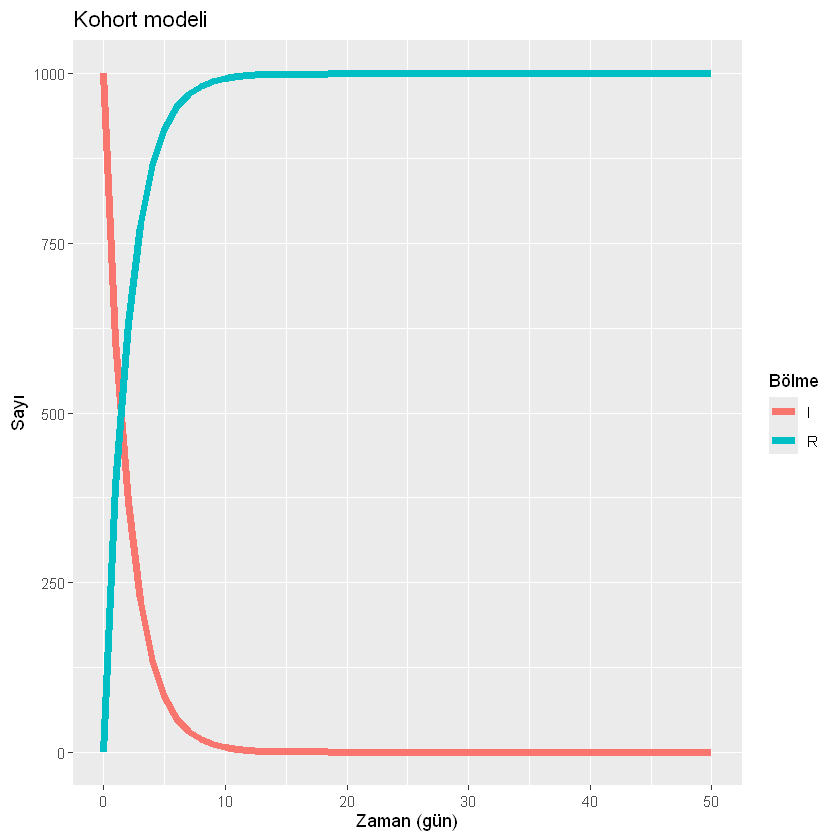

In [2]:
## MODEL ÇIKTISI (ode entegrasyon algoritmasını kullanarak diferansiyel denklemleri çözme)

# ode fonksiyonunu (deSolve paketinden) kullanıyoruz ve yukarıda oluşturduğumuz 
# sistemi ve parametreleri geçiriyoruz

# Model çıktısı output1 veri çerçevesinde saklanacak

output1 <- as.data.frame(ode(y = initial_state_values, 
                             times = times, 
                             func = cohort_model,
                             parms = parameters))

# Konsolda output1 yazarak çıktıya bir göz atalım

# Her durum değişkeninin (I ve R) her birinin bir sütunu olduğunu görürsünüz
# Bu sonuçları çizmek için uzun format denilen şeyi istiyoruz, bu yüzden rehsape 
# paketini ve "melt" fonksiyonunu kullanarak çıktımızı o formatta alalım

# çıktı veri setini uzun formata çevir
output1_long <- melt(as.data.frame(output1), id = "time")                  

# Konsolda output1_long yazarak çıktıya bir göz atalım


## Model çıktısını çiz

# I ve R bölmelerindeki kişi sayısını zaman içinde çiz
ggplot(data = output1_long,                                              # çizilecek verileri içeren nesneyi belirt
       aes(x = time, y = value, colour = variable, group = variable)) +  # sütunları eksenlere ve gruplara ata
  geom_line(size=2) +                                                    # verileri çizgi olarak temsil et
  xlab("Zaman (gün)")+                                                   # x ekseni için etiket ekle
  ylab("Sayı") +                                                         # y ekseni için etiket ekle
  labs(colour = "Bölme",                                                 # açıklama başlığı ekle  
  title = "Kohort modeli")  





Görev: Yukarıdaki kodu kullanarak aynı modeli çalıştırmayı keşfedin ama şimdi kohortumuzda ortalama enfeksiyon süresinin iki gün yerine 10 gün olduğu bir senaryoyu hayal edin. Grafiğin neden farklı göründüğünü açıklayabilir misiniz?

### Çözüm

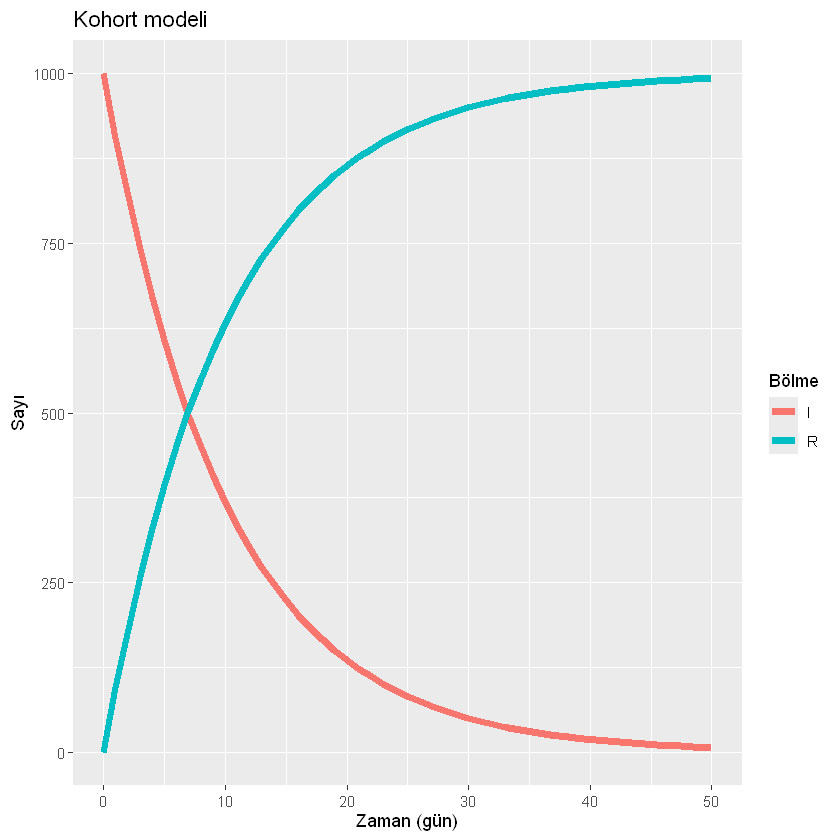

In [3]:

# İpucu: gamma'yı 10 günlük bir oran olarak değiştir 

parameters <- c(gamma = 1/10)

# Tekrar çalıştır 
output1 <- as.data.frame(ode(y = initial_state_values, 
                             times = times, 
                             func = cohort_model,
                             parms = parameters))

# Konsolda output1 yazarak çıktıya bir göz atalım

# Her durum değişkeninin (I ve R) her birinin bir sütunu olduğunu görürsünüz
# Bu sonuçları çizmek için uzun format denilen şeyi istiyoruz, bu yüzden rehsape 
# paketini ve "melt" fonksiyonunu kullanarak çıktımızı o formatta alalım

# çıktı veri setini uzun formata çevir
output1_long <- melt(as.data.frame(output1), id = "time")                  

# Konsolda output1_long yazarak çıktıya bir göz atalım


## Model çıktısını çiz

# I ve R bölmelerindeki kişi sayısını zaman içinde çiz
ggplot(data = output1_long,                                              # çizilecek verileri içeren nesneyi belirt
       aes(x = time, y = value, colour = variable, group = variable)) +  # sütunları eksenlere ve gruplara ata
  geom_line(size=2) +                                                    # verileri çizgi olarak temsil et
  xlab("Zaman (gün)")+                                                   # x ekseni için etiket ekle
  ylab("Sayı") +                                                         # y ekseni için etiket ekle
  labs(colour = "Bölme",                                                 # açıklama başlığı ekle  
  title = "Kohort modeli")  





Bu grafik temel olarak iyileşme zamanının (gamma) şimdi daha uzun olduğu gerçeğini yansıtıyor (iki gün yerine 10 gün). Bu nedenle, "I"nin azalması ve "R"nin artması daha az keskin.